<a href="https://colab.research.google.com/github/Samuyel-256/Edunet/blob/main/DB_SCAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [66]:
mall_data = pd.read_csv('Mall_Customers.csv')
print(mall_data.shape)

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))


(200, 5)
There are 200 rows and 5 columns in our dataset.


In [67]:
from sklearn.cluster import DBSCAN


In [68]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [69]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()

DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points


In [70]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()

DBSCAN_clust_sizes.columns = ["DBSCAN_size"]

DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


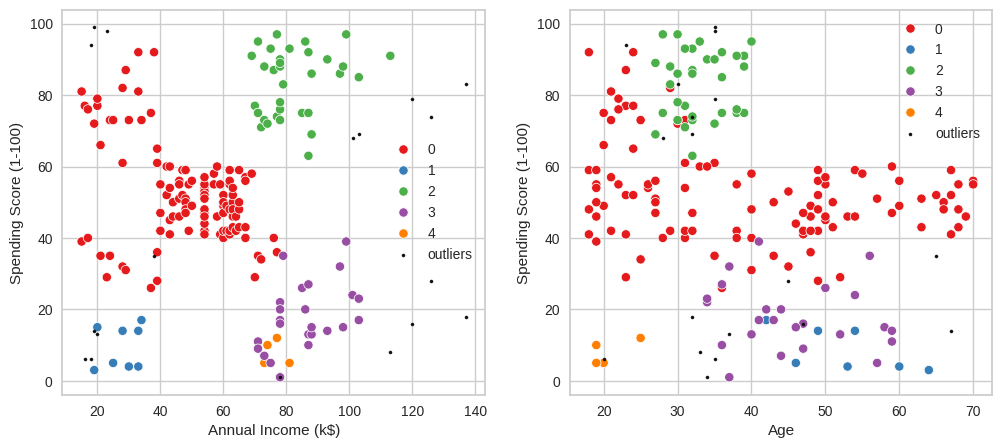

In [71]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',

                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',

                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],

                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

axes[0].legend()

axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')

plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

